# Calculate CESM Indeces

This file just calculates all the indeces for all months for all cesmFullForcingFiles.

Could be generalised if desired.

In [8]:
#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils.sstIndex as sst
import utils.pslIndex as psl
import utils.timePeriod as tp

%run "utils/compound.ipynb"

In [3]:
import xarray
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

Data for climatology

In [4]:
sstClimatDs=fh.loadModelData('CESM-LME', 'SST', '0850cntl.001')
pslClimatDs=fh.loadModelData('CESM-LME', 'PSL', '0850cntl.001')

sstClimat=sst.calculateClimatology(sstClimatDs, 850, 2005)
pslClimat=psl.calculateClimatology(pslClimatDs, 850, 2005)

#loading both those things
for keys in sstClimat:
    sstClimat[keys].load()
    
pslClimat.load()

E:/CMIP5-PMIP3/CESM-LME/mon/SST/
Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.085001-089912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.090001-099912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.100001-109912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.110001-119912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.120001-129912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.130001-139912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.140001-149912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.150001-159912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.0850cntl.001.pop.h.SST.160001-169912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.B1850C5CN.f19_g16.

<xarray.Dataset>
Dimensions:  (time: 13872)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00
Data variables:
    lat1     (time) float32 1.015e+05 1.018e+05 ... 1.018e+05 1.016e+05
    lat2     (time) float32 9.869e+04 9.825e+04 ... 9.766e+04 9.842e+04

In [5]:
sstClimatDs.close()
pslClimatDs.close()

For each experiment in Full Forcings, calculate all the indeces

In [ ]:
timePIndeces=dict()

for experiment in _model.cesmFullForcings:
    print(experiment)
    sstDs = fh.loadModelData('CESM-LME', 'SST', experiment)
    pslDs = fh.loadModelData('CESM-LME', 'PSL', experiment)
    pslIndex, junk = psl.calculateSamIndex(pslDs, pslClimat)
    sstIndex = sst.calculateIndex(sstDs, sstClimat) #(reducing the model set at this step could save time?)
    indeces = xarray.merge([pslIndex, sstIndex])
    indeces.assign_attrs(climatology='calculated based on 850-2005 climatology from the control run')
    #indeces.to_netcdf('results/cesmMonthlyIndeces/' + experiment + '.nc')

    
    timePIndeces[experiment] = tp.averageForTimePeriod(indeces)

# RCP8.5 extensions are a special case

    if experiment in ['002','003', '008', '009']:

        #pre2005Ds = xarray.load_dataset('results/cesmMonthlyIndeces/' + experiment + '.nc')

        print('LME.'+experiment)

        sstDs = fh.loadModelData('CESM-LME', 'SST', 'LME\.'+experiment)

        extensionIndex=sst.calculateIndex(sstDs, sstClimat)

        sstIndex = xarray.concat(
            #(pre2005Ds[[keys for keys in extensionIndex.data_vars]],
            (sstIndex,
             extensionIndex),
            'time'
        )


        pslDs = fh.loadModelData('CESM-LME', 'PSL', 'LME.'+experiment)

        extensionIndex=psl.calculateSamIndex(pslDs, pslClimat)

        pslIndex=xarray.concat(
            #(pre2005Ds[[keys for keys in extensionIndex.data_vars]],
            (pslIndex,
             extensionIndex),
            'time'
        )

        indeces = xarray.merge([pslIndex, sstIndex])
        indeces.assign_attrs(climatology='calculated based on 850-1850 climatology')
        #indeces.to_netcdf('results/cesmMonthlyIndeces/LME.' + experiment + '.nc')

    
        timePIndeces['LME.'+experiment] = tp.averageForTimePeriod(indeces)

001
E:/CMIP5-PMIP3/CESM-LME/mon/SST/
Files imported: 
 ['E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.085001-089912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.090001-099912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.100001-109912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.110001-119912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.120001-129912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.130001-139912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.140001-149912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.150001-159912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.160001-169912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.170001-179912.nc', 'E:/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTR

In [ ]:
#loading both those things
for keys in sstClimat:
    sstClimat[keys].close()
    
pslClimat.close()

# Calculate CESM Indeces

This grabs the monthly CESM indeces, and calculates the averages for the time periods of interest (aka the warm season), as set in the _indexDefitionions file

Theres a few examples of output at the bottom to sanity check this is meaningful

In [ ]:
#experimentSet = ['LME.002']
experimentSet = _model.cesmAll

The indeces for each month have already been calculated. So loading up the saves versions, and putting them into a dict of pandas arrays.

To make this all easier to deal with, convert the result into an xarray and add some extra relevant information as attributes.

This allows for filtering by index, year or experiment 

In [ ]:
# so i've just written the results into a dict of pandas array. This is kinda funky because I can't slice one index across multiple models
# instead, put the whole thing into an xarray with a dimension for the experiment
results=xarray.concat(
    [
        xarray.DataArray(timePIndeces[experiment], 
                         dims=['year','index'], 
                         coords={
                             'year':timePIndeces[experiment].index,
                             'index':timePIndeces[experiment].columns,
                             'experiment': experiment})
    for experiment in experimentSet 
    ],
    dim='experiment'
)

results.assign_attrs({indeces.attrs,_index.monthsOfInterest})



Save the result for use later

In [ ]:
results.to_netcdf('results/cesmTradIndeces.nc')

# Some sanity checks to see if it looks ok:


In [ ]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

#results.sel(experiment='001', index='nino34').plot(label='001')
results.sel(experiment='LME.002', index='nino34NoDetrend').plot(label='LME.001')
results.sel(experiment='LME.002', index='nino34').plot(label='LME.001')

#Tidy up a bit
plt.title("CESM Full Forcing Nino34 Ensemble")
plt.ylim(-4,4)
plt.minorticks_on()
plt.legend()

In [ ]:
# A multi-experiment mean?

mean = results.sel(index='sam').mean(dim='experiment')
std = results.sel(index='sam').std(dim='experiment')

In [ ]:
plt.figure()
mean.plot()
std.plot()

In [ ]:
# why limit yourself to one index?

mean = results.sel(experiment=_model.cesmFullForcings).mean(dim='experiment')
std = results.sel(experiment=_model.cesmFullForcings).std(dim='experiment')

In [ ]:
std

# Calculate Compound Years for CESM

In [5]:
# Here is the data
indecesDa = xarray.open_dataarray('results/cesmTradIndeces.nc')

indecesDa.experiment.values

array(['LME.002', 'LME.003', 'LME.008', 'LME.009', '001', '002', '003',
       '004', '005', '006', '007', '008', '009', '010', '011', '012',
       '013'], dtype=object)

# Define a criteria to determine events

So we are going to define events as follows:
- For SST indeces (aka Enso and Iod), this is 1 sigma above/below mean
- For PSL indeces (aka Sam) this is 0.5 sigma above/below mean

For now, using a 850-1850 climatology

In [6]:
# This should calculate stds for all experiments and all indeces
stdDa = indecesDa.std(dim='year')

# define some criteria that we want to use to identifiy it thats an event
criteriaDa = xarray.concat(
    (stdDa.sel(index=['nino34','dmi']), stdDa.sel(index='sam')/2),
    'index'
)

# Calculate the compounding years and plot an example

In [9]:
firePos, fireNeg = applyCriteria(indecesDa, criteriaDa)

firePos=compound(firePos)

fireNeg=compound(fireNeg)

firePos.to_netcdf('results/cesmFirePos.nc')

fireNeg.to_netcdf('results/cesmFireNeg.nc')

Text(0.5, 1.0, 'LME.002: Pairs and all-three compounds for individal years')

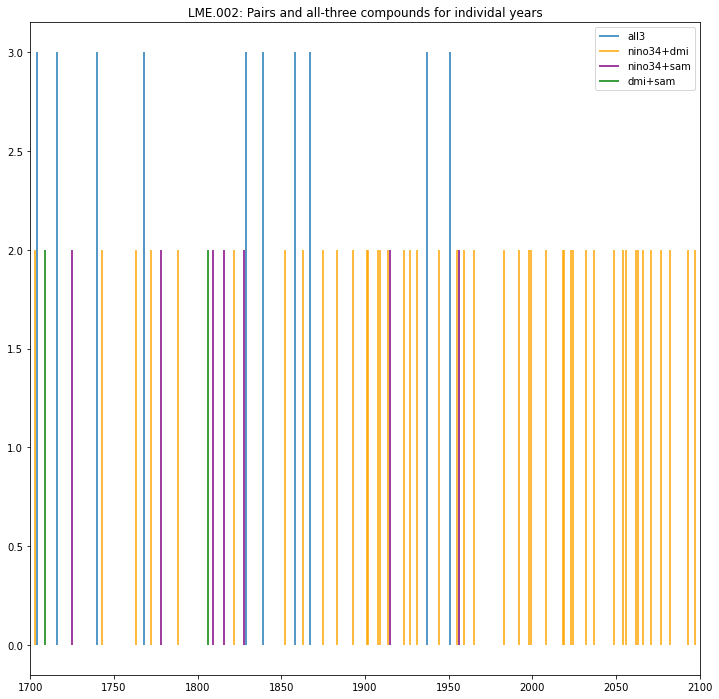

In [11]:
expToPlot = 'LME.002'

toPlot=3*firePos.sel(experiment=expToPlot, index='all3')

plt.figure(figsize=(12,12))

plt.vlines(
    x=firePos.year, 
    ymin=0,
    ymax=toPlot,
    label='all3'
)

colors=['orange', 'purple', 'green']
iCol = 0

for iPair in firePos.attrs['pairs']:
    plt.vlines(
        x=firePos.year, 
        ymin=0,
        ymax=2*firePos.sel(experiment=expToPlot, index=iPair),
        color=colors[iCol],
        label=iPair
    )
    iCol+=1
plt.legend()
plt.xlim(1700,2100)
plt.title(expToPlot+': Pairs and all-three compounds for individal years')